In [522]:
import pandas as pd
import numpy as np
from datetime import datetime, timedelta
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler, PolynomialFeatures

# show all columns when displaying a data frame
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

# 1.0 Data Preeprocessing

In [560]:
dtypes = {'country':'category', 'cat_name':'category', 'cat_slug':'category', 'loc_name':'category', 
'loc_country':'category', 'loc_state':'category', 'loc_type':'category', 'main_category':'category', 
'sub_category':'category', 'goal_categorical':'category', 'currency':'category', 'usd_type':'category'}
frame_all = pd.read_csv('data/Kickstarter_full.csv', index_col=0, parse_dates=['created_at', 'launched_at', 'deadline', 'state_changed_at'], dtype=dtypes)

In [561]:
columns = frame_all.columns

In [562]:
columns

Index(['backers_count', 'blurb', 'converted_pledged_amount', 'country',
       'created_at', 'currency', 'currency_symbol', 'currency_trailing_code',
       'current_currency', 'deadline', 'disable_communication', 'fx_rate',
       'goal', 'id', 'is_starrable', 'launched_at', 'name', 'pledged', 'slug',
       'source_url', 'spotlight', 'staff_pick', 'state', 'state_changed_at',
       'static_usd_rate', 'usd_pledged', 'usd_type', 'dur_inactive',
       'dur_until_state_changed', 'dur_active', 'dur_ratio', 'cat_name',
       'cat_slug', 'loc_name', 'loc_country', 'loc_state', 'loc_type',
       'photo_thumb', 'photo_large', 'project_address', 'profile_photo',
       'creator_name', 'creator_id', 'creator_thumb', 'creator_address',
       'main_category', 'sub_category', 'goal_surpass', 'goal_surpass_share',
       'goal_surpass_usd', 'goal_usd', 'goal_categorical', 'blurb_words',
       'blurb_len', 'name_len', 'name_words', 'state_bool', 'baseline'],
      dtype='object')

In [563]:
to_delete = ['backers_count',
 'blurb',
 'created_at',
 'converted_pledged_amount',
 'currency_symbol',
 'currency_trailing_code',
 'current_currency',
 'deadline',
 'goal',
 'id',
 'is_starrable',
 'launched_at',
 'name',
 'pledged',
 'slug',
 'source_url',
 'spotlight',
 'staff_pick',
 'state',
 'state_changed_at',
 'usd_pledged',
 'cat_name',
 'cat_slug',
 'loc_name',
 'loc_country',
 'loc_state',
 'photo_thumb',
 'photo_large',
 'project_address',
 'profile_photo',
 'creator_name',
 'creator_id',
 'creator_thumb',
 'creator_address',
 'goal_surpass',
 'goal_surpass_share',
 'goal_surpass_usd',
 'baseline',
 'disable_communication',
 'goal_usd',
 'dur_until_state_changed',
 'dur_ratio',
 'fx_rate',
 'static_usd_rate',
 'blurb_words',
 'name_words'
 ]

# Additionally deleted: 
# Cannot be known a priori: 'dur_until_state_changed', 'dur_ratio'
# Somehow a duplicate: 'goal_usd', 'blurb_words', 'name_words'
# For other reasons: 'fx_rate', 'static_usd_rate'

In [564]:
frame_all.drop(columns=to_delete, inplace=True)

In [565]:
# Save category-column-names in list
categorical_cols = frame_all.select_dtypes(include='category').columns

# Create dummies
frame_all = pd.get_dummies(frame_all, columns = categorical_cols, drop_first=True)

In [566]:
# save numerical features in a list
num_features = frame_all.select_dtypes(include='number').columns.to_list()
num_features.remove('state_bool')

In [567]:
X = frame_all.drop('state_bool', axis=1)
y = frame_all.state_bool

In [604]:
RSEED=42
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=RSEED)

# 2.0 Random Forest Model  - Bruce Lee Model

In [569]:
# Features for feature importances
features = list(X_train.columns)

# Create the model with 100 trees
model = RandomForestClassifier(n_estimators=100, 
                               random_state=RSEED, 
                               max_features = 'sqrt',
                               n_jobs=-1, verbose = 1)

# Fit on training data
model.fit(X_train, y_train)


n_nodes = []
max_depths = []

# Stats about the trees in random forest
for ind_tree in model.estimators_:
    n_nodes.append(ind_tree.tree_.node_count)
    max_depths.append(ind_tree.tree_.max_depth)
    
print(f'Average number of nodes {int(np.mean(n_nodes))}')
print(f'Average maximum depth {int(np.mean(max_depths))}')

# Training predictions (to demonstrate overfitting)
train_rf_predictions = model.predict(X_train)
train_rf_probs = model.predict_proba(X_train)[:, 1]

# Testing predictions (to determine performance)
rf_predictions = model.predict(X_test)
rf_probs = model.predict_proba(X_test)[:, 1]

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    4.7s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:   10.1s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.


Average number of nodes 61897
Average maximum depth 104


[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.5s
[Parallel(n_jobs=8)]: Done 100 out of 100 | elapsed:    1.4s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.4s
[Parallel(n_jobs=8)]: Done 100 out of 100 | elapsed:    1.1s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.1s
[Parallel(n_jobs=8)]: Done 100 out of 100 | elapsed:    0.4s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.2s
[Parallel(n_jobs=8)]: Done 100 out of 100 | elapsed:    0.4s finished


In [570]:
from sklearn.metrics import precision_score, recall_score, roc_auc_score, roc_curve


# Plot formatting
plt.style.use('fivethirtyeight')
plt.rcParams['font.size'] = 18

# Function for calculating the evaluation metrics and plotting the ROC-curve
# TODO: CHANGE BASELINE MODEL TO OURS?

def evaluate_model(predictions, probs, train_predictions, train_probs):
    """Compare machine learning model to baseline performance.
    Computes statistics and shows ROC curve."""
    
    baseline = {}
    
    baseline['recall'] = recall_score(y_test, 
                                     [1 for _ in range(len(y_test))])
    baseline['precision'] = precision_score(y_test, 
                                      [1 for _ in range(len(y_test))])
    baseline['roc'] = 0.5
    
    results = {}
    
    results['recall'] = recall_score(y_test, predictions)
    results['precision'] = precision_score(y_test, predictions)
    results['roc'] = roc_auc_score(y_test, probs)
    
    train_results = {}
    train_results['recall'] = recall_score(y_train, train_predictions)
    train_results['precision'] = precision_score(y_train, train_predictions)
    train_results['roc'] = roc_auc_score(y_train, train_probs)
    
    for metric in ['recall', 'precision', 'roc']:
        print(f'{metric.capitalize()} Baseline: {round(baseline[metric], 2)} Test: {round(results[metric], 2)} Train: {round(train_results[metric], 2)}')
    
    # Calculate false positive rates and true positive rates
    base_fpr, base_tpr, _ = roc_curve(y_test, [1 for _ in range(len(y_test))])
    model_fpr, model_tpr, _ = roc_curve(y_test, probs)

    plt.figure(figsize = (8, 6))
    plt.rcParams['font.size'] = 10
    
    # Plot both curves
    plt.plot(base_fpr, base_tpr, 'b', label = 'baseline')
    plt.plot(model_fpr, model_tpr, 'r', label = 'model')
    plt.legend();
    plt.xlabel('False Positive Rate'); 
    plt.ylabel('True Positive Rate'); plt.title('ROC Curves');
    plt.show();


In [571]:
from sklearn.metrics import classification_report, confusion_matrix
import itertools

# Function to plot the confusion matrix

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Oranges):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    Source: http://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    # Plot the confusion matrix
    plt.figure(figsize = (5, 5))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title, size = 15)
    plt.colorbar(aspect=4)
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45, size = 14)
    plt.yticks(tick_marks, classes, size = 14)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    
    # Labeling the plot
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt), fontsize = 10,
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")
        
    plt.grid(None)
    plt.tight_layout()
    plt.ylabel('True label', size = 18)
    plt.xlabel('Predicted label', size = 18)


In [572]:
# Just a checkpoint if variables are filled

y_train.value_counts()

1    70913
0    55594
Name: state_bool, dtype: int64

## 2.1 Evaluation of the simple Random Forest Model

Recall Baseline: 1.0 Test: 0.79 Train: 1.0
Precision Baseline: 0.56 Test: 0.8 Train: 1.0
Roc Baseline: 0.5 Test: 0.86 Train: 1.0


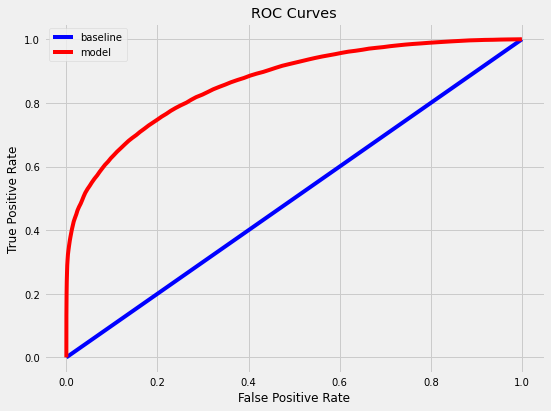

In [573]:
evaluate_model(rf_predictions, rf_probs, train_rf_predictions, train_rf_probs)
# plt.savefig('image/nb1_roc_auc_curve.png')

Confusion matrix, without normalization
[[13877  4655]
 [ 4906 18732]]


/var/folders/_2/0mbl5gkd02l3mjd7fnqkpl1c0000gn/T/ipykernel_35682/2516166632.py:27: MatplotlibDeprecationWarning: Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.
  plt.colorbar(aspect=4)


Confusion matrix, without normalization
[[55594     0]
 [    2 70911]]


/var/folders/_2/0mbl5gkd02l3mjd7fnqkpl1c0000gn/T/ipykernel_35682/2516166632.py:27: MatplotlibDeprecationWarning: Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.
  plt.colorbar(aspect=4)


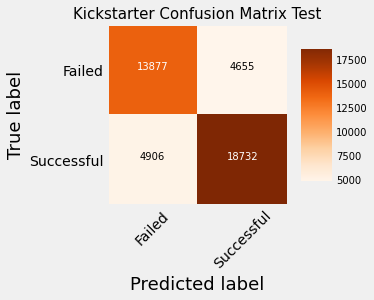

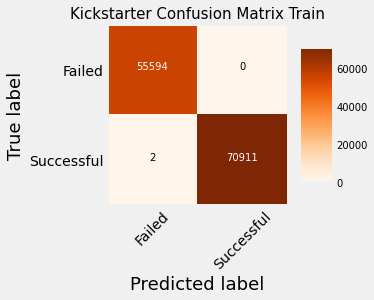

In [661]:
# Execute confusion matrices

# Confusion matrix TEST
cm_test = confusion_matrix(y_test, rf_predictions)
plot_confusion_matrix(cm_test, classes = ['Failed','Successful'],
                      title = 'Kickstarter Confusion Matrix Test')

# Confusion matrix TRAIN
cm_train = confusion_matrix(y_train, train_rf_predictions)
plot_confusion_matrix(cm_train, classes = ['Failed','Successful'],
                      title = 'Kickstarter Confusion Matrix Train')

# plt.savefig('image/nb1_cm.png')

In [575]:
# Execute classification matrices

cr_train = classification_report(y_train, train_rf_predictions)
print('Classification on train data')
print(cr_train)

cr_test = classification_report(y_test, rf_predictions)
print('Classification on test data')
print(cr_test)



Classification on train data
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     55594
           1       1.00      1.00      1.00     70913

    accuracy                           1.00    126507
   macro avg       1.00      1.00      1.00    126507
weighted avg       1.00      1.00      1.00    126507

Classification on test data
              precision    recall  f1-score   support

           0       0.74      0.75      0.74     18532
           1       0.80      0.79      0.80     23638

    accuracy                           0.77     42170
   macro avg       0.77      0.77      0.77     42170
weighted avg       0.77      0.77      0.77     42170



In [392]:
# from sklearn.tree import plot_tree

# fig = plt.figure(figsize=(25,20))
# RF_tree_plot = plot_tree(model.estimators_[0], filled=True)

## 2.2 Calculate and plot feature Importance

In [576]:
# Check feature importances

fi_model = pd.DataFrame({'feature': features,
                   'importance': model.feature_importances_}).\
                    sort_values('importance', ascending = False)

print("Top15 Features sorted by importance")
print(fi_model.head(15))

Top15 Features sorted by importance
                        feature  importance
0                  dur_inactive    0.162345
3                      name_len    0.115412
1                    dur_active    0.108656
2                     blurb_len    0.107478
38       usd_type_international    0.018996
52           main_category_food    0.014948
205   goal_categorical_1_to_500    0.014499
210  goal_categorical_500_to_5k    0.013435
58     main_category_technology    0.011547
94     sub_category_documentary    0.010911
176         sub_category_shorts    0.009856
193    sub_category_video games    0.009136
138   sub_category_mobile games    0.008353
196            sub_category_web    0.008313
144     sub_category_nonfiction    0.008247


Link to documentation:
https://scikit-learn.org/stable/auto_examples/ensemble/plot_forest_importances.html

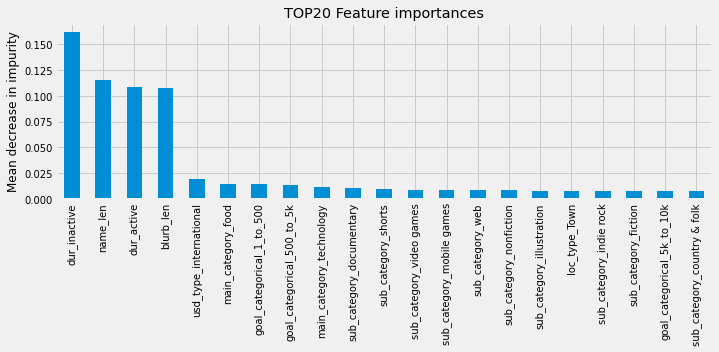

In [577]:
feature_names = [f"feature {i}" for i in range(X.shape[1])]
importances = model.feature_importances_
# std = np.std([tree.feature_importances_ for tree in model.estimators_], axis=0)

# forest_importances_test = pd.Series(importances, index=feature_names)

forest_importances_imp = pd.Series(importances, index=features)
forest_importances_imp_top20 = forest_importances_imp.sort_values(ascending=False).iloc[0:21]

fig, ax = plt.subplots(figsize=(10, 5))
forest_importances_imp_top20.plot.bar(ax=ax)
ax.set_title("TOP20 Feature importances")
ax.set_ylabel("Mean decrease in impurity")
fig.tight_layout()

In [468]:
 datetime.today().strftime('%Y-%m-%d')

'2022-04-03'

In [472]:
# Save permutation feature importances in a csv
transfer_csv = forest_importances_imp.reset_index().rename(columns={'index': 'feature', 0:'importance'}).sort_values('importance', ascending=False)
date =  datetime.today().strftime('%Y-%m-%d-%H_%M')
transfer_csv.to_csv(f'data/{date}_feature_importances_impurity.csv')

[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.3s
[Parallel(n_jobs=8)]: Done 100 out of 100 | elapsed:    0.7s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.9s
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.9s
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.9s
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    1.0s
[Parallel(n_jobs=8)]: Done 100 out of 100 | elapsed:    2.2s finished
[Parallel(n_jobs=8)]: Done 100 out of 100 | elapsed:    2.2s finished
[Parallel(n_jobs=8)]: Done 100 out of 100 | elapsed:    2.2s finished
[Parallel(n_job

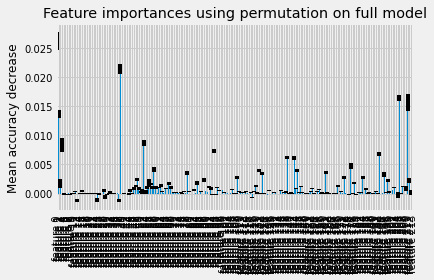

In [410]:
# Feature importance based on feature permutation¶
# ACHTUNG: DIESE BERECHNUNG HAT BEI MIR CA. 45 Minuten gedauert!!

from sklearn.inspection import permutation_importance

result = permutation_importance(model, X_test, y_test, n_repeats=10, random_state=42, n_jobs=-1)




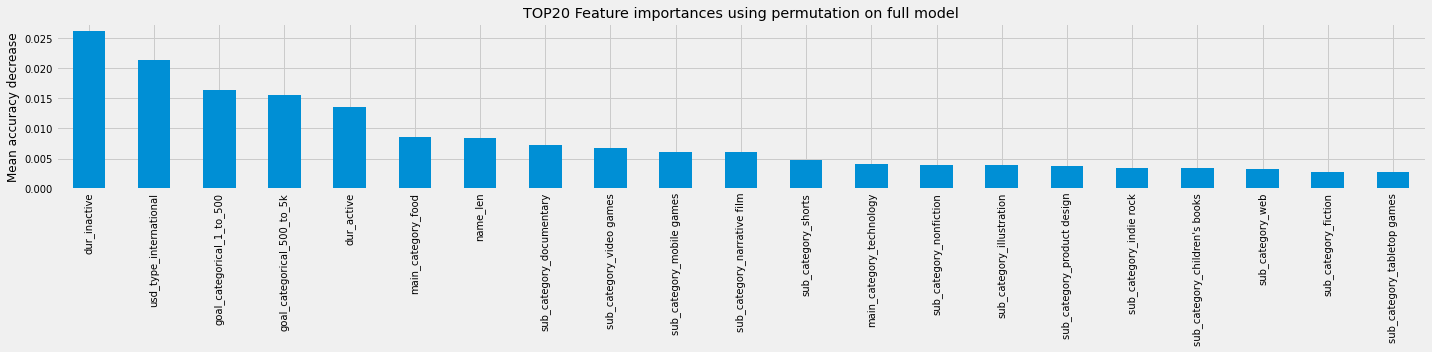

In [445]:
forest_importances = pd.Series(result.importances_mean, index=features)
importances_top20 = forest_importances.sort_values(ascending=False).iloc[0:21]

fig, ax = plt.subplots(figsize=(20,5))
importances_top20.plot.bar(ax=ax)
ax.set_title("TOP20 Feature importances using permutation on full model")
ax.set_ylabel("Mean accuracy decrease")
fig.tight_layout()
plt.show()

In [473]:
# Save permutation feature importances in a csv
transfer_csv = forest_importances.reset_index().rename(columns={'index': 'feature', 0:'importance'}).sort_values('importance', ascending=False)
date =  datetime.today().strftime('%Y-%m-%d-%H_%M')
transfer_csv.to_csv(f'data/{date}_feature_importances_permutation.csv')

## 2.3 Error analysis

In [630]:
# Make a copy of X_test
frame_all_test_error = X_test.copy(deep=True)

In [631]:
# Add target variable, related proedictions and probs to the dataset

frame_all_test_error['y_pred']= rf_predictions.tolist()
frame_all_test_error['y_prob']= rf_probs.tolist()
frame_all_test_error['y_test'] = y_test.to_list()
frame_all_test_error.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 42170 entries, 133935 to 106610
Columns: 217 entries, dur_inactive to y_test
dtypes: float64(4), int64(3), uint8(210)
memory usage: 12.0 MB


In [662]:
# Define function to create variable which informs about True Positive, True Negative, False Positive and False Negative

def TP_TN_FP_FN(true_state, pred_state):
    """Function takes true target variable and predicted target variable to 
    classify between True Positive, True Negative, False Positive and False Negative.

    Args:
        true_state (int): observations of true target variable
        pred_state (int): estimated predictions for the target variable based on X_test

    Returns:
        classification (str): Returns categorical variable including TP=True Positive, TN=True Negative, FP=False Positive and FN=False Negative
    """    ''''''
    if true_state == 0 and pred_state == 0:
        classification = "TN"
    elif true_state == 1 and pred_state == 1:
        classification = "TP"
    elif true_state == 0 and pred_state == 1:
        classification = "FP"
    else:
        classification = "FN"
    return classification

In [636]:
# Apply classification function to create a new column

frame_all_test_error['confusion'] = frame_all_test_error.apply(lambda x: TP_TN_FP_FN(x['y_test'], x['y_pred']), axis=1)

In [642]:
# Group dataset by confusion outcome in order to find differences between correct and incorrect classified cases

frame_all_test_error.groupby('confusion').median()

,dur_inactive,dur_active,blurb_len,name_len,country_AU,country_BE,country_CA,country_CH,country_DE,country_DK,country_ES,country_FR,country_GB,country_HK,country_IE,country_IT,country_JP,country_LU,country_MX,country_NL,country_NO,country_NZ,country_SE,country_SG,country_US,currency_CAD,currency_CHF,currency_DKK,currency_EUR,currency_GBP,currency_HKD,currency_JPY,currency_MXN,currency_NOK,currency_NZD,currency_SEK,currency_SGD,currency_USD,usd_type_international,loc_type_Estate,loc_type_Island,loc_type_LocalAdmin,loc_type_Miscellaneous,loc_type_Suburb,loc_type_Town,loc_type_Zip,main_category_comics,main_category_crafts,main_category_dance,main_category_design,main_category_fashion,main_category_film & video,main_category_food,main_category_games,main_category_journalism,main_category_music,main_category_photography,main_category_publishing,main_category_technology,main_category_theater,sub_category_3d printing,sub_category_academic,sub_category_accessories,sub_category_action,sub_category_animals,sub_category_animation,sub_category_anthologies,sub_category_apparel,sub_category_apps,sub_category_architecture,sub_category_art books,sub_category_audio,sub_category_bacon,sub_category_blues,sub_category_calendars,sub_category_camera equipment,sub_category_candles,sub_category_ceramics,sub_category_children's books,sub_category_childrenswear,sub_category_chiptune,sub_category_civic design,sub_category_classical music,sub_category_comedy,sub_category_comic books,sub_category_community gardens,sub_category_conceptual art,sub_category_cookbooks,sub_category_country & folk,sub_category_couture,sub_category_crochet,sub_category_digital art,sub_category_diy,sub_category_diy electronics,sub_category_documentary,sub_category_drama,sub_category_drinks,sub_category_electronic music,sub_category_embroidery,sub_category_events,sub_category_experimental,sub_category_fabrication tools,sub_category_faith,sub_category_family,sub_category_fantasy,sub_category_farmer's markets,sub_category_farms,sub_category_festivals,sub_category_fiction,sub_category_fine art,sub_category_flight,sub_category_food trucks,sub_category_footwear,sub_category_gadgets,sub_category_gaming hardware,sub_category_glass,sub_category_graphic design,sub_category_graphic novels,sub_category_hardware,sub_category_hip-hop,sub_category_horror,sub_category_illustration,sub_category_immersive,sub_category_indie rock,sub_category_installations,sub_category_interactive design,sub_category_jazz,sub_category_jewelry,sub_category_kids,sub_category_knitting,sub_category_latin,sub_category_letterpress,sub_category_literary journals,sub_category_literary spaces,sub_category_live games,sub_category_makerspaces,sub_category_metal,sub_category_mixed media,sub_category_mobile games,sub_category_movie theaters,sub_category_music videos,sub_category_musical,sub_category_narrative film,sub_category_nature,sub_category_nonfiction,sub_category_painting,sub_category_people,sub_category_performance art,sub_category_performances,sub_category_periodicals,sub_category_pet fashion,sub_category_photo,sub_category_photobooks,sub_category_places,sub_category_playing cards,sub_category_plays,sub_category_poetry,sub_category_pop,sub_category_pottery,sub_category_print,sub_category_printing,sub_category_product design,sub_category_public art,sub_category_punk,sub_category_puzzles,sub_category_quilts,sub_category_r&b,sub_category_radio & podcasts,sub_category_ready-to-wear,sub_category_residencies,sub_category_restaurants,sub_category_robots,sub_category_rock,sub_category_romance,sub_category_science fiction,sub_category_sculpture,sub_category_shorts,sub_category_small batch,sub_category_software,sub_category_sound,sub_category_space exploration,sub_category_spaces,sub_category_stationery,sub_category_tabletop games,sub_category_taxidermy,sub_category_television,sub_category_textiles,sub_category_thrillers,sub_category_translations,sub_category_typography,sub_category_vegan,sub_category_video,sub_category_video ar

## 2.4 Prediction of stakeholder project

https://www.kickstarter.com/projects/displayjoefigures/series-1-display-cases/description

In [655]:
# load data of stakeholder project

x_test_real = pd.read_csv('data/20220404_x_test_real_new.csv', sep=";", index_col=0)

In [656]:
x_test_real

,dur_inactive,name_len,dur_active,blurb_len,usd_type_international,main_category_food,goal_categorical_1_to_500,goal_categorical_500_to_5k,main_category_technology,sub_category_documentary,sub_category_shorts,sub_category_video games,sub_category_mobile games,sub_category_web,sub_category_nonfiction,sub_category_illustration,loc_type_Town,sub_category_indie rock,sub_category_fiction,goal_categorical_5k_to_10k,sub_category_country & folk,goal_categorical_10k_to_25k,sub_category_narrative film,sub_category_children's books,sub_category_rock,sub_category_product design,goal_categorical_25k_to_50k,goal_categorical_50k_to_100k,sub_category_tabletop games,main_category_music,sub_category_comic books,currency_USD,country_US,goal_categorical_200k_to_1m,main_category_publishing,main_category_film & video,main_category_comics,main_category_dance,currency_EUR,sub_category_hip-hop,main_category_games,country_GB,currency_GBP,main_category_crafts,loc_type_Suburb,sub_category_webseries,sub_category_software,main_category_photography,main_category_journalism,main_category_theater,sub_category_apparel,main_category_fashion,sub_category_accessories,main_category_design,sub_category_animation,currency_CAD,country_CA,sub_category_apps,sub_category_electronic music,sub_category_diy,country_AU,sub_category_public art,sub_category_mixed media,sub_category_comedy,sub_category_digital art,sub_category_classical music,sub_category_performance art,sub_category_jewelry,sub_category_food trucks,sub_category_sculpture,sub_category_painting,sub_category_academic,sub_category_world music,sub_category_pop,sub_category_television,sub_category_live games,sub_category_ready-to-wear,sub_category_art books,sub_category_drama,sub_category_young adult,sub_category_graphic design,sub_category_hardware,sub_category_woodworking,sub_category_people,sub_category_poetry,sub_category_drinks,sub_category_playing cards,country_IT,sub_category_conceptual art,country_DE,sub_category_horror,sub_category_events,sub_category_action,sub_category_photobooks,sub_category_places,sub_category_restaurants,sub_category_jazz,country_FR,sub_category_graphic novels,sub_category_radio & podcasts,sub_category_faith,sub_category_experimental,sub_category_gadgets,country_MX,currency_MXN,sub_category_nature,sub_category_plays,sub_category_periodicals,sub_category_candles,country_NL,sub_category_spaces,sub_category_anthologies,sub_category_thrillers,sub_category_music videos,country_ES,sub_category_childrenswear,sub_category_festivals,sub_category_r&b,sub_category_small batch,sub_category_musical,sub_category_wearables,sub_category_footwear,sub_category_metal,sub_category_science fiction,loc_type_LocalAdmin,country_SE,sub_category_fine art,sub_category_webcomics,sub_category_diy electronics,sub_category_installations,sub_category_print,currency_SEK,sub_category_architecture,sub_category_video,sub_category_farms,sub_category_family,sub_category_performances,sub_category_textiles,sub_category_interactive design,sub_category_farmer's markets,sub_category_sound,sub_category_ceramics,sub_category_calendars,sub_category_robots,sub_category_3d printing,sub_category_audio,sub_category_gaming hardware,sub_category_zines,sub_category_fantasy,country_DK,sub_category_workshops,currency_DKK,country_NZ,currency_NZD,sub_category_animals,sub_category_crochet,goal_categorical_1m_to_5m,sub_category_stationery,country_IE,sub_category_vegan,sub_category_flight,sub_category_camera equipment,sub_category_immersive,sub_category_movie theaters,sub_category_couture,sub_category_cookbooks,loc_type_Zip,sub_category_punk,sub_category_literary journals,sub_category_blues,sub_category_kids,sub_category_civic design,sub_category_puzzles,sub_category_printing,country_HK,sub_category_glass,currency_HKD,country_BE,sub_category_knitting,country_NO,sub_category_space exploration,sub_category_video art,sub_category_latin,currency_CHF,currency_NOK,country_CH,country_SG,sub_category_translations,currency_SGD,sub_category_photo,sub_ca

In [657]:
# Predict success or failure of stakeholder project
case_predictions = model.predict(x_test_real)
case_probs = model.predict_proba(x_test_real)[:, 1]

/Users/c_messerschmidt/Documents/neuefische/kick_it_like_beckham/.venv/lib/python3.9/site-packages/sklearn/base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names must be in the same order as they were in fit.

  warnings.warn(message, FutureWarning)
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.1s
[Parallel(n_jobs=8)]: Done 100 out of 100 | elapsed:    0.2s finished
/Users/c_messerschmidt/Documents/neuefische/kick_it_like_beckham/.venv/lib/python3.9/site-packages/sklearn/base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names must be in the same order as they were in fit.

  warnings.warn(message, FutureWarning)
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel

In [664]:
print("RESULT:")
print(f"The project campaign of the stakeholder is estimated to be {case_predictions} (0= Fail, 1=Success).")
print(f"The estimated prpbability for the result is {case_probs}.")

RESULT:
The project campaign of the stakeholder is estimated to be [1] (0= Fail, 1=Success).
The estimated prpbability for the result is [0.52].


# 3.0 Randomized Search - Bruce Lee Model

In [398]:
from sklearn.model_selection import RandomizedSearchCV

# Hyperparameter grid
param_grid = {
    'n_estimators': np.linspace(10, 200).astype(int),
    # 'max_depth': [None] + list(np.linspace(3, 20).astype(int)),
    'max_features': ['auto', 'sqrt', None] + list(np.arange(0.5, 1, 0.1)),
    'max_leaf_nodes': [None] + list(np.linspace(10, 50, 500).astype(int)),
    'min_samples_split': [2, 5, 10],
    'bootstrap': [True, False]
}

# Estimator for use in random search
estimator = RandomForestClassifier(random_state = RSEED)

# Create the random search model
rs = RandomizedSearchCV(estimator, param_grid, n_jobs = -1, 
                        scoring = 'accuracy', cv = 3, 
                        n_iter = 10, verbose = 5, random_state=RSEED)

# Fit 
rs.fit(X_train, y_train)

Fitting 3 folds for each of 10 candidates, totalling 30 fits
[CV 1/3] END bootstrap=False, max_features=auto, max_leaf_nodes=47, min_samples_split=5, n_estimators=29;, score=0.734 total time=   4.2s
[CV 2/3] END bootstrap=True, max_features=sqrt, max_leaf_nodes=34, min_samples_split=2, n_estimators=41;, score=0.732 total time=   4.3s
[CV 3/3] END bootstrap=True, max_features=sqrt, max_leaf_nodes=34, min_samples_split=2, n_estimators=41;, score=0.726 total time=   4.4s
[CV 1/3] END bootstrap=True, max_features=sqrt, max_leaf_nodes=34, min_samples_split=2, n_estimators=41;, score=0.730 total time=   4.4s
[CV 2/3] END bootstrap=False, max_features=auto, max_leaf_nodes=47, min_samples_split=5, n_estimators=29;, score=0.730 total time=   4.7s
[CV 3/3] END bootstrap=False, max_features=auto, max_leaf_nodes=47, min_samples_split=5, n_estimators=29;, score=0.733 total time=   5.2s
[CV 1/3] END bootstrap=True, max_features=sqrt, max_leaf_nodes=28, min_samples_split=2, n_estimators=79;, score=0.

RandomizedSearchCV(cv=3, estimator=RandomForestClassifier(random_state=42),
                   n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_features': ['auto', 'sqrt', None,
                                                         0.5, 0.6, 0.7,
                                                         0.7999999999999999,
                                                         0.8999999999999999],
                                        'max_leaf_nodes': [None, 10, 10, 10, 10,
                                                           10, 10, 10, 10, 10,
                                                           10, 10, 10, 10, 11,
                                                           11, 11, 11, 11, 11,
                                                           11, 11, 11, 11, 11,
                                                           11, 12, 12, 12, 12, ...],
                                      

In [399]:
rs.best_params_

{'n_estimators': 153,
 'min_samples_split': 5,
 'max_leaf_nodes': 43,
 'max_features': 'sqrt',
 'bootstrap': True}

## 3.1 Evaluation of the model from randomized grid search

Average number of nodes 85
Average maximum depth 22
Recall Baseline: 1.0 Test: 0.82 Train: 0.82
Precision Baseline: 0.56 Test: 0.73 Train: 0.73
Roc Baseline: 0.5 Test: 0.82 Train: 0.83


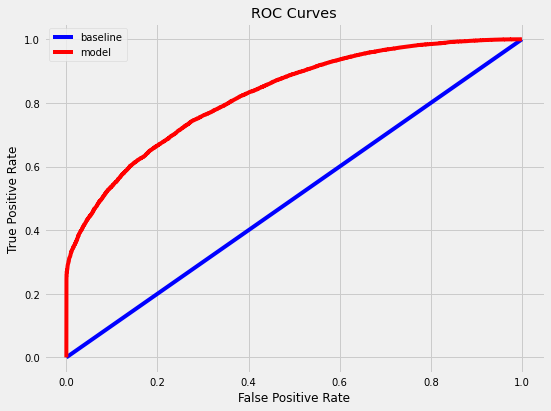

In [400]:
best_model = rs.best_estimator_

R_train_rf_predictions = best_model.predict(X_train)
R_train_rf_probs = best_model.predict_proba(X_train)[:, 1]

R_rf_predictions = best_model.predict(X_test)
R_rf_probs = best_model.predict_proba(X_test)[:, 1]

n_nodes = []
max_depths = []

for ind_tree in best_model.estimators_:
    n_nodes.append(ind_tree.tree_.node_count)
    max_depths.append(ind_tree.tree_.max_depth)
    
print(f'Average number of nodes {int(np.mean(n_nodes))}')
print(f'Average maximum depth {int(np.mean(max_depths))}')

evaluate_model(R_rf_predictions, R_rf_probs, R_train_rf_predictions, R_train_rf_probs)

In [503]:
print(len(R_train_rf_probs))
print(len(R_rf_probs))

126507
42170


Confusion matrix, without normalization
[[11470  7062]
 [ 4238 19400]]
Confusion matrix, without normalization
[[34413 21181]
 [12442 58471]]


/var/folders/_2/0mbl5gkd02l3mjd7fnqkpl1c0000gn/T/ipykernel_35682/2516166632.py:27: MatplotlibDeprecationWarning: Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.
  plt.colorbar(aspect=4)
/var/folders/_2/0mbl5gkd02l3mjd7fnqkpl1c0000gn/T/ipykernel_35682/2516166632.py:27: MatplotlibDeprecationWarning: Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.
  plt.colorbar(aspect=4)


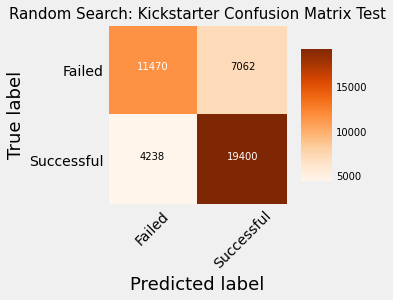

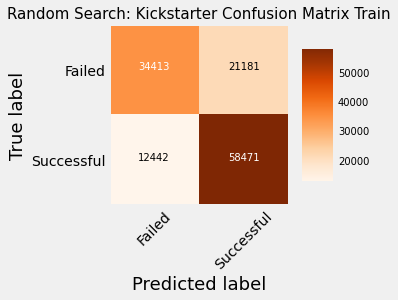

In [401]:
# Execute confusion matrices

# Confusion matrix TEST
cm_R_test = confusion_matrix(y_test, R_rf_predictions)
plot_confusion_matrix(cm_R_test, classes = ['Failed','Successful'],
                      title = 'Random Search: Kickstarter Confusion Matrix Test')

# Confusion matrix TRAIN
cm_R_train = confusion_matrix(y_train, R_train_rf_predictions)
plot_confusion_matrix(cm_R_train, classes = ['Failed','Successful'],
                      title = 'Random Search: Kickstarter Confusion Matrix Train')

In [504]:
# Execute classification matrices

cr_R_train = classification_report(y_train, R_train_rf_predictions)
print('Classification on train data')
print(cr_R_train)

cr_R_test = classification_report(y_test, R_rf_predictions)
print('Classification on test data')
print(cr_R_test)


Classification on train data
              precision    recall  f1-score   support

           0       0.73      0.62      0.67     55594
           1       0.73      0.82      0.78     70913

    accuracy                           0.73    126507
   macro avg       0.73      0.72      0.72    126507
weighted avg       0.73      0.73      0.73    126507

Classification on test data
              precision    recall  f1-score   support

           0       0.73      0.62      0.67     18532
           1       0.73      0.82      0.77     23638

    accuracy                           0.73     42170
   macro avg       0.73      0.72      0.72     42170
weighted avg       0.73      0.73      0.73     42170



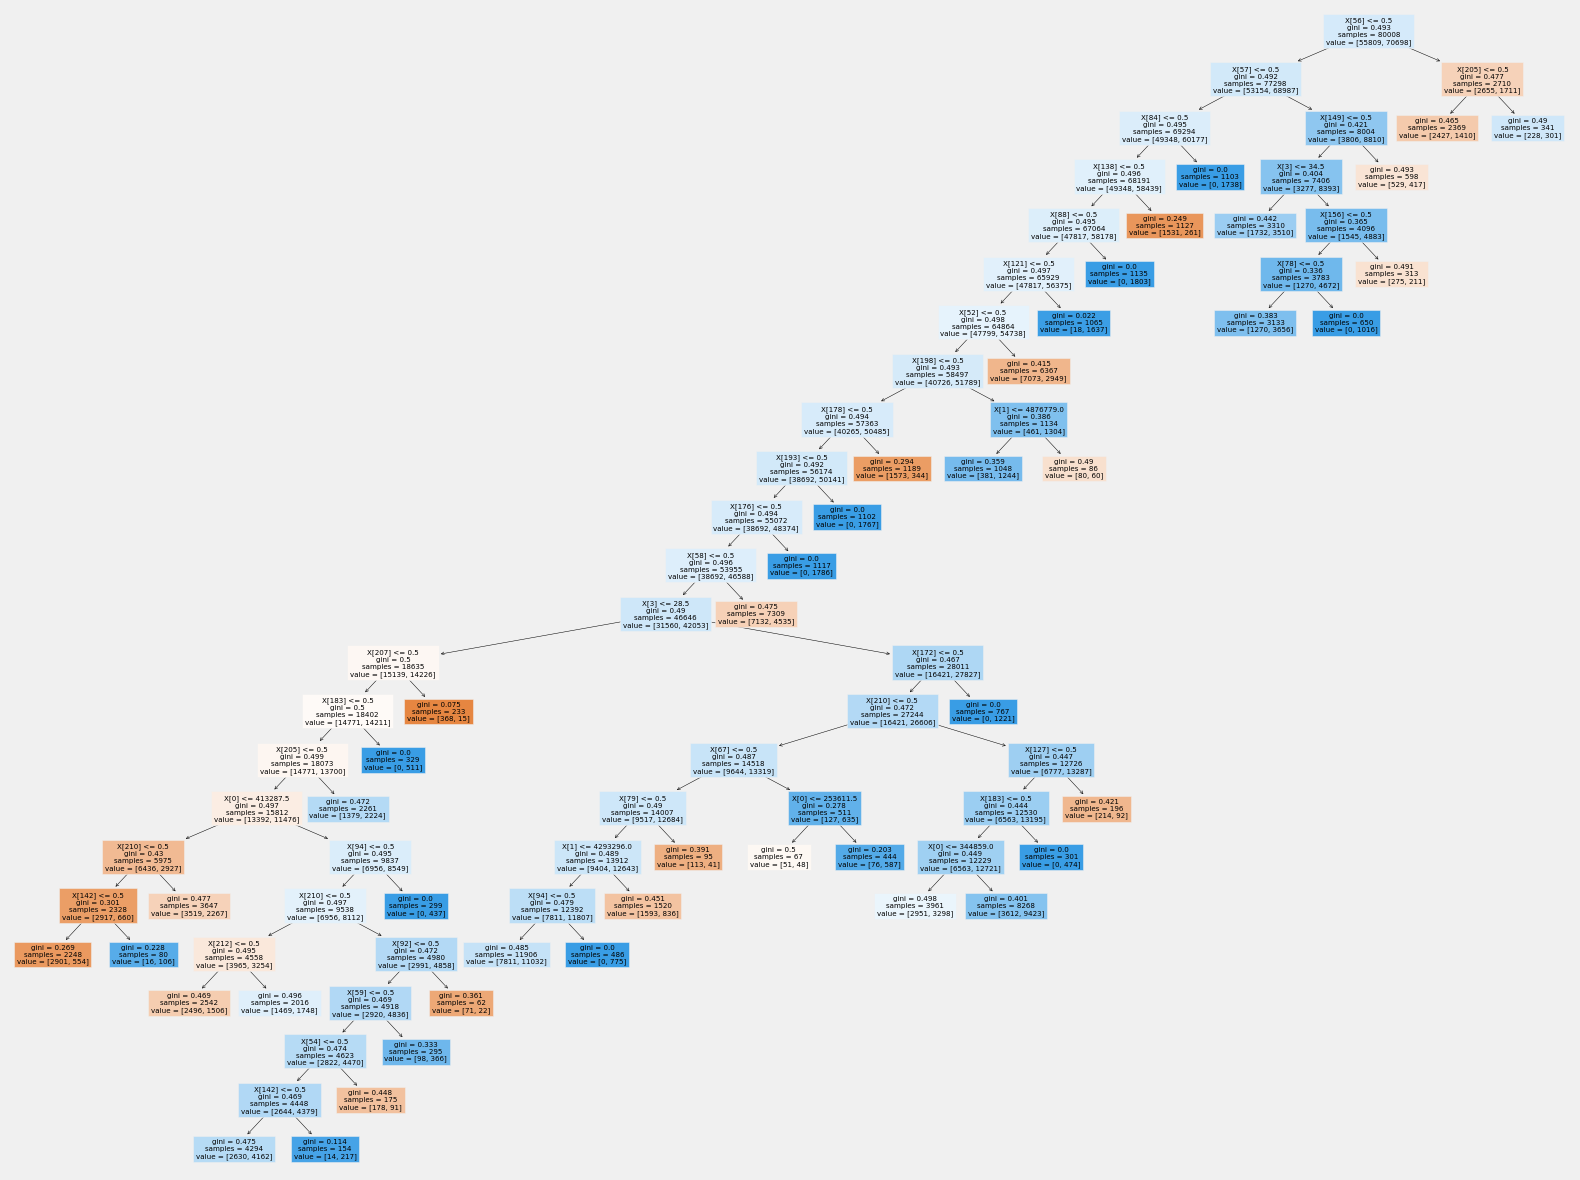

In [403]:
from sklearn.tree import plot_tree

fig = plt.figure(figsize=(25,20))
dectree_plot = plot_tree(best_model.estimators_[0], filled=True)